##Importing the Datasets:

In [1]:
#import packages:
import pandas as pd

#assign the file to the variable:
beers = pd.read_csv("Downloads/craft-cans/beers.csv")

breweries = pd.read_csv("Downloads/craft-cans/breweries.csv")

In [2]:
#print first 5 rows of beers dataframe:
beers.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [3]:
#print first 5 rows of breweries dataframe:
breweries.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


Beers:

ID: Unique identifier of the beer.
Name: Name of the beer.
ABV: Alcohol by volume of the beer.
IBU: International Bittering Units of the beer.
Style: Style of the beer.
Ounces: Ounces of beer.

Breweries:

ID: Unique identifier of the brewery.
Name: Name of the brewery.
City: City where the brewery is located.
State: State where the brewery is located.

In [4]:
#datatypes of (beers) each columns and their datatypes:
beers.dtypes

Unnamed: 0      int64
abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

In [5]:
#datatypes of (breweries) each columns and their datatypes:
breweries.dtypes

Unnamed: 0     int64
name          object
city          object
state         object
dtype: object

##Descriptive Statistics

We shall focus on IBU variable, as it's numerical variable.

Length

The len function counts the number of observations in a Series. The function will count all observations, regardless if there are missing or null values.

In [9]:
length = len(beers['ibu'])

length

##In this series, we have 2410 observations.

2410

Count

The count function will return the number of non-NA/non-null observations in a Series.

In [10]:
count = beers['ibu'].count()

print(count)

##We have, 1405 not null observations in the series.

1405


Missing Values

With the Length and the Count, we are now able to calculate the number of missing values. The number of missing values is the difference between the Length and the Count.

In [11]:
number_of_missing_values = length - count
pct_of_missing_values = float(number_of_missing_values / length)
pct_of_missing_values = "{0:.1f}%".format(pct_of_missing_values*100)
print(pct_of_missing_values)

41.7%


To output the missing values as a percentage, we simply divide the number of missing values by the total number of observations, the length. The float function is used to make sure the decimals are captured in the division. The format function is used to nicely format the number as a percentage.

In this case, we are missing almost 42% of the IBU variable. This is important for us to know because it will affect our analysis. Most of the descriptive statistics will ignore those missing values and this will certainly cause a bias.

Minimum/Maximum Value

The minimum and maximum value of a dataset can easily be obtained with the min and max function on a Series.

In [13]:
print("Min value: ", beers['ibu'].min())
print("Max value: ", beers['ibu'].max())

Min value:  4.0
Max value:  138.0


The min/max values are helpful to understand the range of values in a variable. In this case, the IBU ranges from 4 to 138.

Mode

The mode is the most frequent value in a dataset. It can be obtained using the mode function on a Series.

In [14]:
print(beers['ibu'].mode())

0    20.0
dtype: float64


In a normal distribution, the mode is equal to the mean and median.

In this case, the mode of the IBU variable is 20. It is the most frequent IBU in our dataset.

Mean

The mean is a measure of central tendency. It represents the sum of the values divided by the count of non-missing observations.

It can be obtained with the mean function on a Series.

In [15]:
beers['ibu'].mean()

42.71316725978647

The mean is prone to be influenced by outliers. A few extreme values can greatly change the mean, dragging it up or down.

Median

The median is also a measure of central tendency. It is the number exactly in the middle of an ordered list of numerical values.

In [16]:
beers['ibu'].median()

35.0

In the case of skewed distributions, the median is a much better measure of central tendency than the mean.

In the case of the IBU distribution, the mean and the median are in the same orders of magnitude.

Standard Deviation

The standard deviation is a measure of dispersion. A high standard deviation indicates the data points are spread over a wide range of values. The standard deviation is expressed in the same unit as the values.

In [17]:
beers['ibu'].std()

25.954065911259324

In this case, the standard deviation is ~26. If the distribution of IBU was a normal distribution, we would know that ~68% of the observations are within one standard deviation of the mean.

Quantile Statistics

Quantiles are cut points that split a distribution in equal sizes. Many quantiles have their own name. If you split a distribution into four equal groups, the quantile you created is named quartile. You can easily create quantile using the quantile function on a Series. You can pass to that function an array with the different quantiles to compute. In the case below, we want to split our distribution in four equal groups.

In [18]:
beers['ibu'].quantile([.25, .5, .75])

0.25    21.0
0.50    35.0
0.75    64.0
Name: ibu, dtype: float64

As you can see above, the 50% quantile is equal to the median. It is the value that splits the dataset in half. We can also note that 75% of the observations are equal or below to 64 IBU. Furthermore, 50% of the distribution is located between 21 and 64 IBU. It's important to note that the missing values are not taken into account in those metrics.

Distribution Plots

Visualizations are very useful in exploratory data analysis. In this post, we will not go over the topic visualizations. However, we can't talk about data profiling without mentioning the importance of a frenquency-distribution plot. It is one of the simplest yet most powerful visualization. It demonstrates the frequency of each value in our dataset.

To create this visualization, we are using the seaborn`` library with thedisplotfunction. This function expects aSeries` with no missing values.

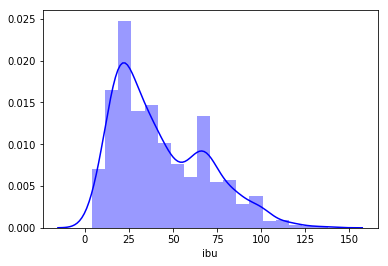

In [24]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.distplot(beers['ibu'].dropna(), color='blue');

plt.show()

Correlations

Correlations are a great way to discover relationships between numerical variables. There are various ways to calculate the correlation. The Pearson correlation coefficient is a widely used approach that measures the linear dependence between two variables. The correlation coefficient ranges from -1 to 1. A correlation of 1 is a total positive correlation, a correlation of -1 is a total negative correlation and a correlation of 0 is non-linear correlation. We can perform that calculation using the corr function on a Series. 

By default, this function will use the Pearson correlation coefficient calculation. It is possible to use different methods of calculation with this function.

In [31]:
beers[['abv', 'ibu', 'ounces']].corr()

,abv,ibu,ounces
abv,1.000000,0.670621,0.172529
ibu,0.670621,1.000000,0.054691
ounces,0.172529,0.054691,1.000000


As you can see above, the correlation between IBU and itself is 1. Obviously, numerical variables are perfectly correlated with themselves. More interestingly, you can see that the correlation of the ABV and IBU is equal to  0.670621. While this is not a total positive correlation, it is still highly correlated.


A few notes on non-numerical variables:

The metrics that have been previously extracted are mostly applicable for numerical values only. If you are dealing with other types of data such as categorical data, you can still gather some interesting measurements. You could calculate the frequency of each value in the dataset.

DataFrame have a function named describe that summarizes the dataset. If your DataFrame only has categorical or text values, the summary will be adapted specifically for this type of data.

In [33]:
beers[['name', 'style']].describe()

,name,style
count,2410,2405
unique,2305,99
top,Nonstop Hef Hop,American IPA
freq,12,424
